Exercises from https://ds.codeup.com/stats/probability-distributions/

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
from env import get_db_url

In [4]:
n_sim = 10_000

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<AxesSubplot:>

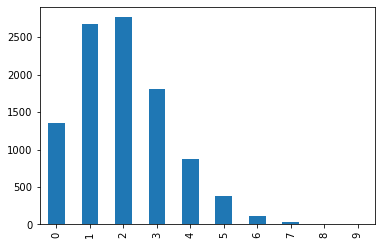

In [2]:
pd.Series(stats.poisson(2).rvs(10_000)).value_counts().sort_index().plot.bar()

1. What is the probability that no cars drive up in the noon hour?

In [3]:
stats.poisson(2).cdf(0)

0.1353352832366127

In [18]:
# By simulation
cars = np.random.poisson(2, size=(n_sim))

In [19]:
(cars == 0).mean()

0.1352

1. What is the probability that 3 or more cars come through the drive through?

In [34]:
stats.poisson(2).sf(2)

0.32332358381693654

In [28]:
# By simulation
cars = np.random.poisson(2, size=(n_sim))

In [31]:
(cars>=3).mean()

0.3249

1. How likely is it that the drive through gets at least 1 car?

In [35]:
stats.poisson(2).sf(0)

0.8646647167633873

In [33]:
# By simulation
(cars>=1).mean()

0.8737

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
What grade point average is required to be in the top 5% of the graduating class?

In [160]:
u = 3.0
d = 0.3
stats.norm(u,d).isf(0.05)

3.4934560880854417

In [161]:
##### SIMULATION NEEDS WORK!!

grades = np.random.normal(u,d,n_sim)

In [165]:
np.quantile(grades,0.95)

3.4933554881168023

2. What GPA constitutes the bottom 15% of the class?

In [52]:
stats.norm(u,d).ppf(0.15)

2.689069983151863

In [166]:
# Simulation...
np.quantile(grades,0.15)

2.6932977359134784

2. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [167]:
lower = stats.norm(u,d).ppf(.20)
upper = stats.norm(u,d).ppf(.20)+(stats.norm(u,d).ppf(0.3)-stats.norm(u,d).ppf(0.2))

print(f"Range of 3rd decile from bottom of the class is \
{lower} to {upper}")
if lower<=2.8<=upper:
    print("A student with 2.8 gpa would qualify")
else:
    print("Student does not qualify")

Range of 3rd decile from bottom of the class is 2.7475136299281258 to 2.842679846187588
A student with 2.8 gpa would qualify


In [170]:
# simulation:
lower = np.quantile(grades, 0.2)
upper = np.quantile(grades, 0.3)
print(f"Simulated: Range of 3rd decile from bottom of the class is \
{lower} to {upper}")
if lower<=2.8<=upper:
    print("A student with 2.8 gpa would qualify")
else:
    print("Student does not qualify")

Simulated: Range of 3rd decile from bottom of the class is 2.748665235533538 to 2.8416181006874233
A student with 2.8 gpa would qualify


2. If I have a GPA of 3.5, what percentile am I in?

In [171]:
gpa = 3.5
print(f"With a gpa of {gpa} you are in the {stats.norm(u,d).cdf(gpa).round(3)} percentile")

With a gpa of 3.5 you are in the 0.952 percentile


In [172]:
# simulation:
print(f"Simulated: With a gpa of {gpa} you are in the {(grades<gpa).mean()} percentile")

Simulated: With a gpa of 3.5 you are in the 0.9522 percentile


3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [185]:
click_rate = 0.02
n_trials = 4326
clicks = 97

print(f"Chance of {stats.binom(n_trials, click_rate).sf(clicks-1)} that {clicks} or more people will click through")

Chance of 0.13975823631416445 that 97 or more people will click through


In [177]:
# simulation

c = np.random.binomial(n_trials, click_rate, size=(10000))

In [186]:
print(f"Simulated: chance of {(c>= clicks).mean()} that {clicks} or more people will click through")

Simulated: chance of 0.1389 that 97 or more people will click through


<AxesSubplot:>

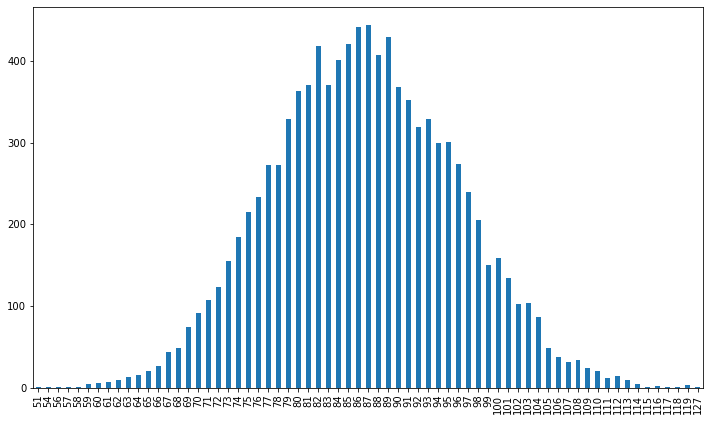

In [184]:
pd.Series(stats.binom(n_trials,click_rate).rvs(10_000)).value_counts().sort_index().plot.bar(figsize=(12,7))

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?

In [208]:
n_trials = 60
p = 1/len(np.linspace(0,1,101))


<AxesSubplot:>

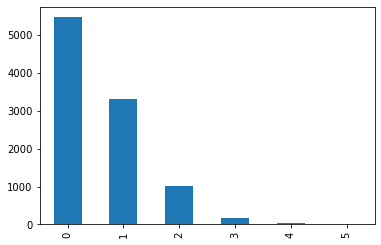

In [219]:
pd.Series(stats.binom(60, p).rvs(10000)).value_counts().sort_index().plot.bar()

<AxesSubplot:>

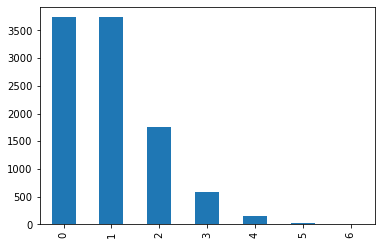

In [218]:
pd.Series(stats.binom(100, p).rvs(10000)).value_counts().sort_index().plot.bar()

In [210]:
# Probability of at least 1 of 60 being correct:
stats.binom(n_trials,p).sf(0)

0.44955038406224

In [214]:
# simulation:
answers = np.random.binomial(60, 0.01, size=(10000))

In [216]:
(answers>0).mean()

0.4502

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [85]:
p_clean_per_students = 0.03
n_students = int(round(0.9 * 3 * 22,0))

In [91]:
stats.binom(n_students,p_clean_per_students).sf(0)

0.8342199288437352

Text(0.5, 0, 'Num successes in n trials')

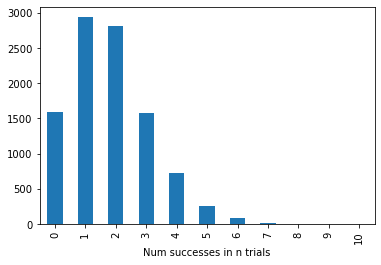

In [92]:
pd.Series(stats.binom(n_students,p_clean_per_students).rvs(10_000)).value_counts().sort_index().plot.bar()
plt.xlabel("Num successes in n trials")

In [93]:
# simulation:


5. How likely is it that it goes two days without getting cleaned up?

In [94]:
stats.binom(n_students,p_clean_per_students).pmf(0)

0.16578007115626453

5.  All week?

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [109]:
time_per_order = 2
u = 15 * time_per_order
d = 3 * time_per_order
order_by = 60-15-10-2


# The time to wait in line must be below the order_by time
print(f"{stats.norm(u,d).cdf(order_by).round(4)} chance of having enough time")

0.6915 chance of having enough time


7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. 

In [118]:
query = """ SELECT * FROM salaries WHERE to_date>CURDATE(); """
current_salaries = pd.read_sql(query, get_db_url('employees'))

In [122]:
u = current_salaries.salary.mean()
d = current_salaries.salary.std()

For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?

In [132]:
stats.norm(u,d).cdf(60_000-0.01)

0.2438572436502896

In [133]:
(current_salaries.salary<60000).mean()

0.2705727041028802

What percent of employees earn more than 95,000?

In [134]:
stats.norm(u,d).sf(95_000)

0.09208819199804053

In [135]:
(current_salaries.salary>95000).mean()

0.1086272092752078

What percent of employees earn between 65,000 and 80,000?

In [136]:
stats.norm(u,d).cdf(80000)-stats.norm(u,d).cdf(65000)

0.3350605685446666

In [139]:
((current_salaries.salary>65000) & (current_salaries.salary<80000)).mean()

0.325107028035515

What do the top 5% of employees make?

In [153]:
print(f"Top 5% of employees make ${stats.norm(u,d).ppf(0.95)} assuming normal distribution")

Top 5% of employees make $100484.64454102775 assuming normal distribution


In [150]:
current_salaries.salary.nlargest(n=int(round(0.05*len(current_salaries),0)),keep = 'last').tail(1)

86888    104228
Name: salary, dtype: int64

In [151]:
current_salaries.salary.quantile(q=0.95)

104225.84999999998